In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#seaborn theme
sns.set(style = "whitegrid")

In [20]:
#load data set
df = pd.read_csv("netflix_titles.csv")

In [24]:
#preview data
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [26]:
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


clean missing value

In [44]:
df["country"] = df["country"].fillna("Unknown")
df["cast"] = df["cast"].fillna("Not Mentioned")
df["director"] = df["director"].fillna("Not Mentioned")

# Corrected date parsing with proper keyword and format inference
df["date_added"] = pd.to_datetime(df["date_added"].astype(str).str.strip(), errors="coerce")

# Extract year and month
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month


------------ 🧪 Analysis 1: Content Added Per Year ------------

In [65]:
df['year_added'] = df['year_added'].astype('Int64')

C:\Users\sam94\AppData\Local\Temp\ipykernel_22168\2574671201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df,x="year_added",palette="plasma",legend=False)


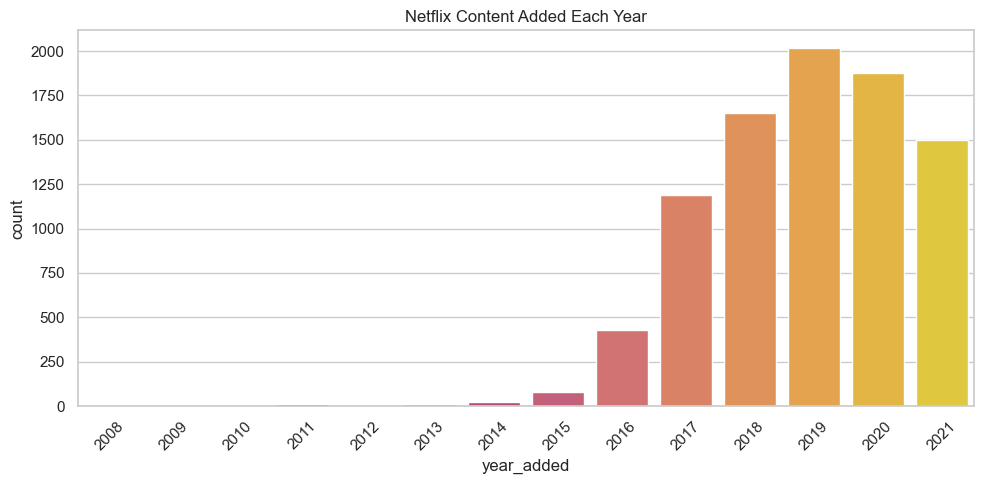

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(data = df,x="year_added",palette="plasma",legend=False)
plt.title("Netflix Content Added Each Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

------------ 🎥 Analysis 2: Type of Content ------------

C:\Users\sam94\AppData\Local\Temp\ipykernel_22168\2792970622.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


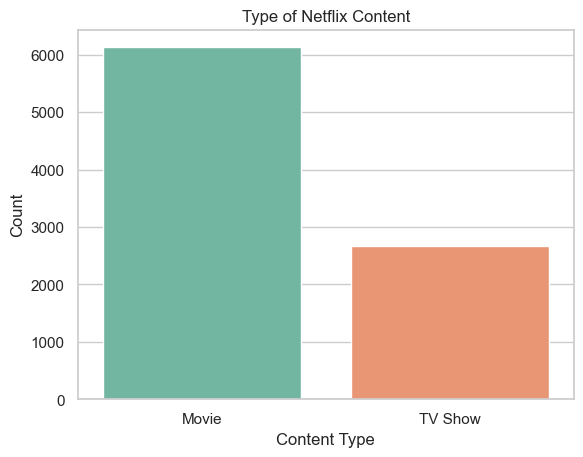

In [78]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Type of Netflix Content')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

------------ 🌍 Analysis 3: Top 10 Countries by Content ------------

C:\Users\sam94\AppData\Local\Temp\ipykernel_22168\2462792263.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette = "mako")


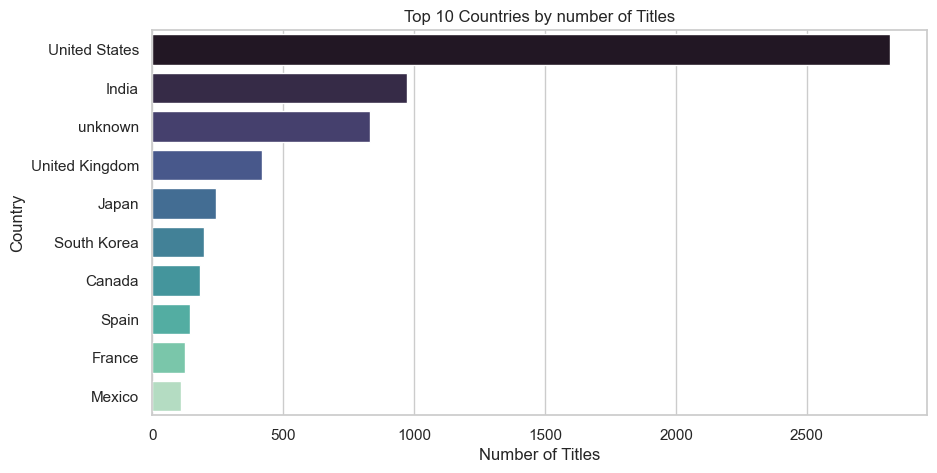

In [84]:
top_countries = df["country"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette = "mako")
plt.title("Top 10 Countries by number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

------------ 🧑‍🎤 Analysis 4: Most Frequent Genres ------------

C:\Users\sam94\AppData\Local\Temp\ipykernel_22168\676654326.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values , y=top_genres.index , palette ="coolwarm")


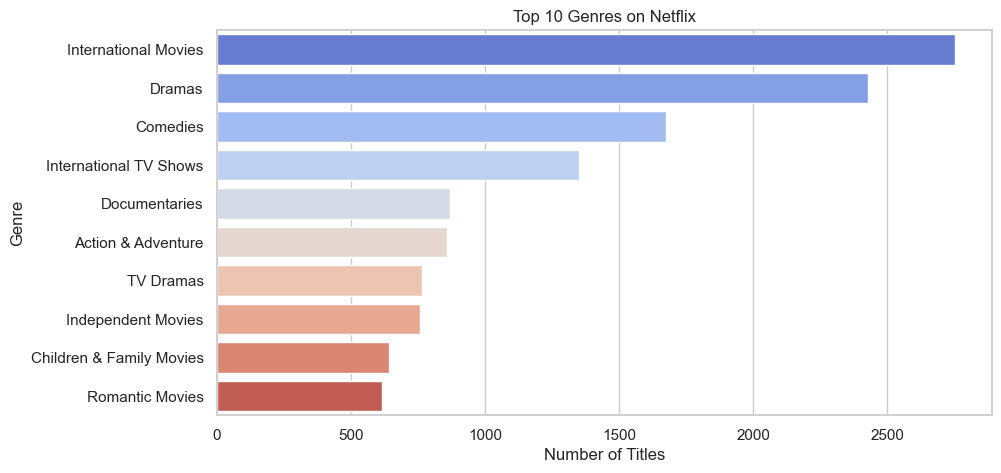

In [94]:
df["listed_in"] = df["listed_in"].astype(str)
genres = df["listed_in"].str.split(",").explode().str.strip()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values , y=top_genres.index , palette ="coolwarm")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

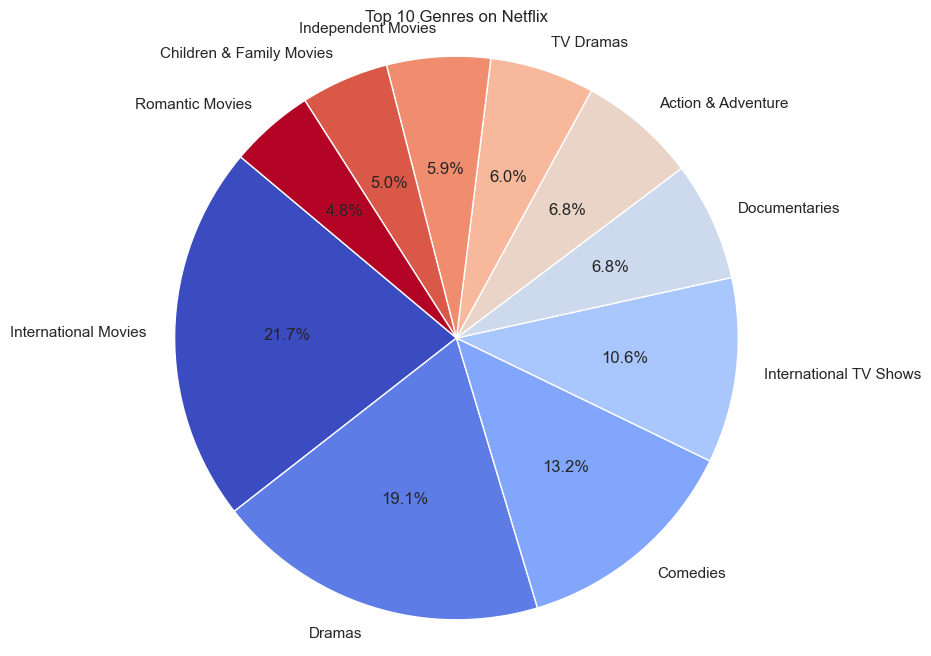

In [105]:

# Make sure 'listed_in' is a string
df["listed_in"] = df["listed_in"].astype(str)

# Split, explode, and strip genres
genres = df["listed_in"].str.split(",").explode().str.strip()

# Get top 10 genres
top_genres = genres.value_counts().head(10)

# Generate a list of colors
colors = plt.cm.coolwarm(np.linspace(0, 1, len(top_genres)))

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_genres.values, labels=top_genres.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Top 10 Genres on Netflix")
plt.axis('equal')  # Equal aspect ratio
plt.show()